In [1]:
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np

In [2]:
def plot_parameters(model):
    w = model.state_dict()['linear.weight'].data
    w_min = w.min().item()
    w_max = w.max().item()
    fig, axes = plt.subplots(2, 5)
    fig.subplots_adjust(hspace = 0.01, wspace = 0.1)
    for i, ax in enumerate(axes.flat):
        if i < 10:
            ax.set_xlabel('Class: {0}'.format(i))
            ax.imshow(w[i, :].view(28, 28), vmin = w_min, vmax = w_max, cmap = 'seismic')
            ax.set_xticks([])
            ax.set_yticks([])
    plt.show()

In [3]:
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(28, 28), cmap = 'gray')
    plt.title('y = ' + str(data_sample[1].item()))

In [4]:
train_dataset = dsets.MNIST(root = './data', train = True, download = True, transform = transforms.ToTensor())
train_dataset

100.1%

Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw


0.0%

113.5%

Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw


100.4%

Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw


180.4%

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw
Processing...
Done!


Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [6]:
validation_dataset = dsets.MNIST(root = './data', train = False, download = True, transform = transforms.ToTensor())
validation_dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [39]:
train_dataset[0].shape

AttributeError: 'tuple' object has no attribute 'shape'

In [12]:
train_dataset[3][1]

1

AttributeError: 'int' object has no attribute 'item'

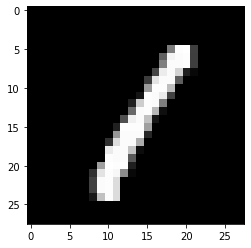

In [13]:
show_data(train_dataset[3])

AttributeError: 'int' object has no attribute 'item'

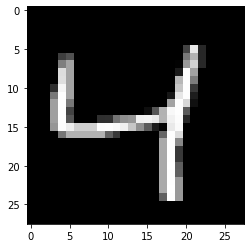

In [14]:
show_data(train_dataset[2])

In [16]:
class SoftMax(nn.Module):
    def __init__(self, input_size, output_size):
        super(SoftMax, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        z = self.linear(x)
        return z

In [21]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [40]:
train_dataset_temp = train_dataset

In [24]:
input_dim = 28 * 28
output_dim = 10

In [25]:
model = SoftMax(input_dim, output_dim)
model

SoftMax(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [27]:
print(list(model.parameters())[0].size())
print(list(model.parameters())[1].size())

torch.Size([10, 784])
torch.Size([10])


In [45]:
for i in range(int(train_dataset_temp[0])):
    torch.flatten(train_dataset_temp[0][i])

TypeError: int() argument must be a string, a bytes-like object or a number, not 'tuple'

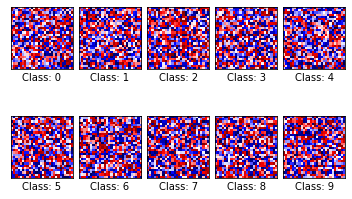

In [28]:
plot_parameters(model)

In [30]:
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
criterion = nn.CrossEntropyLoss()
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = 100)
validation_loader = torch.utils.data.DataLoader(dataset = validation_dataset, batch_size = 5000)

In [33]:
epochs = 10
loss_list = []
accuracy_list = []
n_test = len(validation_dataset)

def train_model(epochs):
    for epoch in range(epochs):
        for x, y in train_loader:
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
        correct = 0
        for x_test, y_test in validation_loader:
            z = model(x_test.view(-1, 28 *28))
            _, y_hat = torch.max(z.data, 1)
            correct += (y_hat == y_test).sum().item()
        accuracy = correct / n_test
        accuracy_list.append(accuracy)

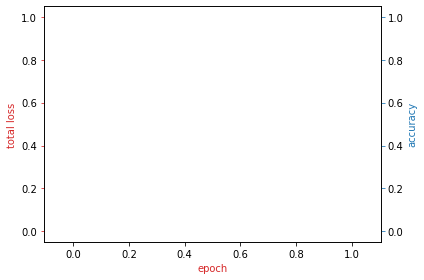

In [34]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list, color = color)
ax1.set_xlabel('epoch', color = color)
ax1.set_ylabel('total loss', color = color)
ax1.tick_params(axis = 'y', color = color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('accuracy', color = color)
ax2.plot(accuracy_list, color = color)
ax2.tick_params(axis = 'y', color = color)
fig.tight_layout()

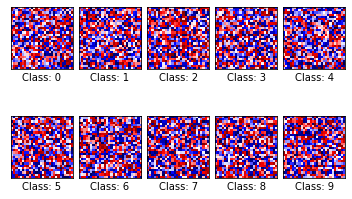

In [46]:
plot_parameters(model)

In [48]:
softmax = nn.Softmax(dim = -1)
count = 0
for x, y in validation_datset:
    z = model(x.reshape(-1, 28 * 28))
    _, y_hat = torch.max(z, 1)
    if y_hat != y:
        show_data((x, y))
        plt.show()
        print(y_hat)
        print(torch.max(softmax(z)).item())
        count += 1
    if count >= 5:
        break

NameError: name 'validation_datset' is not defined